In [1]:
datasets_cloud = '/Users/amee/Library/Mobile Documents/com~apple~CloudDocs/wildlife-datasets/'
root = '/Users/amee/Documents/code/master-thesis/datasets/ATRW/'
# root = os.path.join(datasets_cloud, 'WhaleSharkID')
# datasets.WhaleSharkID.get_data(root)

In [5]:
import yaml
import sys
sys.path.append('..')

from data.combined_datasets import get_dataset

# Load the configuration file
with open('../configs/config-hpc-ATRW.yml', 'r') as file:
    config = yaml.safe_load(file)

# setup dataset
hardcode = {'species': 'ATRW',
            'dataset' : root}
data =  get_dataset(config = config,
                    hardcode=hardcode)


ModuleNotFoundError: No module named 'data.combined_datasets'

In [1]:
import os
import sys
sys.path.append('..')

from wildlife_datasets import analysis, datasets, loader

sys.path.append('..')
dataset = datasets.WhaleSharkID('/Users/amee/Documents/code/master-thesis/datasets/EDA-Whaleshark/')
dataset.df

image_id                              identity  \
0            0  10563a2a-4c62-e8c9-e5a5-8582bf2eb059   
1            1  341569f2-1f34-4884-1dd3-79137be4c77f   
2            2  69f95579-8a42-8d93-8d78-7b641952933c   
3            3  26560de1-6930-ddaf-5069-f7b85acd40fb   
4            4  a785af89-b8c0-5e7b-acec-c4874ec5483f   
...        ...                                   ...   
7688      7688  431741cc-839f-cbaf-9859-162abfa36ba4   
7689      7689  13358d13-b940-7836-2d35-d00e8310b297   
7690      7690  ecec2054-01c7-ed9d-94c6-603a3836f2f2   
7691      7691  461d166d-0321-fe1b-8796-dbcb72672a64   
7692      7692  26560de1-6930-ddaf-5069-f7b85acd40fb   

                                                   path  \
0     whaleshark.coco/images/train2020/000000000001.jpg   
1     whaleshark.coco/images/train2020/000000000002.jpg   
2     whaleshark.coco/images/train2020/000000000003.jpg   
3     whaleshark.coco/images/train2020/000000000004.jpg   
4     whaleshark.coco/images/train2020/000000000005.jpg   
...                                                 ...   
7688  whaleshark.coco/images/train2020/000000007689.jpg   
7689  whaleshark.coco/images/train2020/000000007690.jpg   
7690  whaleshark.coco/images/train2020/000000007691.jpg   
7691  whaleshark.coco/images/train2020/000000007692.jpg   
7692  whaleshark.coco/images/train2020/000000007693.jpg   

                         bbox                 date orientation  
0       [18, 582, 2412, 1248]                  NaN       right  
1      [511, 237, 2387, 1275]                  NaN        left  
2       [317, 627, 2196, 832]                  NaN        left  
3         [78, 7, 2898, 2006]                  NaN        left  
4      [198, 414, 2788, 1561]  2017-02-28 12:28:49        left  
...                       ...                  ...         ...  
7688     [0, 254, 2996, 2171]                  NaN        left  
7689   [624, 479, 2120, 1512]                  NaN        back  
7690     [0, 192, 2917, 2191]                  NaN       right  
7691    [53, 287, 2941, 2092]                  NaN        left  
7692  [1134, 464, 1847, 1495]                  NaN        left  

[7693 rows x 6 columns]

In [6]:
# for first run to add a segmentation column to the cache
import numpy as np
dataset.df['segmentation'] = np.nan
# dataset.df.to_csv("../dataset/dataframe/cache_***.csv", index=False) # do this to save csv, uncommented so i dont rewrite it

In [2]:
from data.raptors_wildlife import Raptors, WildlifeReidDataModule
from data.wildlife_dataset import WildlifeDataModule
# (self, metadata, config = None, data_dir="", preprocess_lvl=0, batch_size=8, size=256, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], num_workers=2, cache_path="../dataset/dataframe/cache.csv", animal_cat='bird', splitter ='closed', only_cache=False):


data = WildlifeDataModule(metadata=dataset.df[:], 
                              data_dir = '/Users/amee/Documents/code/master-thesis/datasets/EDA-whaleshark/', 
                              cache_path= '../dataset/dataframe/cache_whaleshark.csv',
                              preprocess_lvl=3,
                              size=224,
                              animal_cat='fish',
                              only_cache=True
                              )

Split: time-unaware closed-set
Samples: train/test/unassigned/total = 6108/1585/0/7693
Classes: train/test/unassigned/total = 543/512/0/543
Samples: train only/test only        = 31/0
Classes: train only/test only/joint  = 31/0/512

Fraction of train set     = 79.40%
Fraction of test set only = 0.00%
Train set size before pre-processing: 6108
Test set size before pre-processing: 1585


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_l

No segmentation data found: Empty list or list containing empty list.
Removed 1 rows with invalid segmentation data.
Removed 0 rows with invalid segmentation data.


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/animal_2d_keypoint/topdown_heatmap/animal_kingdom/td-hm_hrnet-w32_8xb32-300e_animalkingdom_P3_fish-256x256-76c3999f_20230519.pth
10/31 20:58:15 - mmengine - WARNING - Failed to search registry with scope "mmpose" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmpose" is a correct scope, or whether the registry is initialized.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_m_8xb32-300e_coco/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

10/31 20:58:16 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" regist

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1724557175021/work/aten/src/ATen/native/TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Processed image: 4729 with number of keypoints 23
Processed image: 895 with number of keypoints 23
Processed image: 3694 with number of keypoints 23
Processed image: 1119 with number of keypoints 23
Processed image: 2072 with number of keypoints 23
Processed image: 3887 with number of keypoints 23
Processed image: 2270 with number of keypoints 23
Processed image: 1995 with number of keypoints 23
Processed image: 6134 with number of keypoints 23
Processed image: 1356 with number of keypoints 23
Processed image: 6806 with number of keypoints 23
Processed image: 251 with number of keypoints 23
Processed image: 2619 with number of keypoints 23
Processed image: 985 with number of keypoints 23
Processed image: 4536 with number of keypoints 23
Processed image: 6577 with number of keypoints 23
Processed image: 7285 with number of keypoints 23
Processed image: 6928 with number of keypoints 23
Processed image: 1608 with number of keypoints 23
Processed image: 7312 with number of keypoints 23
Pro

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmdet/models/layers/se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


Processed image: 4689 with number of keypoints 23
Processed image: 1810 with number of keypoints 23
Processed image: 4335 with number of keypoints 23
Processed image: 2254 with number of keypoints 23
Processed image: 1512 with number of keypoints 23
Processed image: 4505 with number of keypoints 23
Processed image: 1276 with number of keypoints 23
Processed image: 4001 with number of keypoints 23
Processed image: 2948 with number of keypoints 23
Processed image: 7663 with number of keypoints 23
Processed image: 656 with number of keypoints 23
Processed image: 6872 with number of keypoints 23
Processed image: 3300 with number of keypoints 23
Processed image: 2252 with number of keypoints 23
Processed image: 4803 with number of keypoints 23
Processed image: 4542 with number of keypoints 23
Processed image: 3540 with number of keypoints 23
Processed image: 4241 with number of keypoints 23
Processed image: 1953 with number of keypoints 23
Processed image: 189 with number of keypoints 23
Pr

In [12]:
import pandas as pd
df_train = data.train_dataloader().dataset.metadata
df_query = data.val_dataloader()[0].dataset.metadata
df_gallery = data.val_dataloader()[1].dataset.metadata

df_all = pd.concat([df_train, df_query, df_gallery])

print(len(df_all))

df_all.to_csv('../dataset/dataframe/cache_EDAwhaleshark.csv', index=False)


2674


In [9]:
train_loader = data.train_dataloader()
df_train = train_loader.dataset.metadata

# df_train

float_values = df_train[df_train['keypoints'].apply(lambda x: not isinstance(x, float))]
float_values

image_id                              identity  \
11         251  053ccacf-2ac3-ce3b-5c55-59a7756bc059   
22          35  058c2047-cdb9-6ce8-8130-80e53f23622f   
82         215  0d0160ac-3076-83fc-76ca-7bf0189d86e1   
103         89  12ed5d40-ef21-29b4-59a9-a83dd109c42d   
105         15  12ed5d40-ef21-29b4-59a9-a83dd109c42d   
...        ...                                   ...   
1995       199  f18cf0dd-b72e-9706-51ef-1abfb25847a2   
2004       148  f18cf0dd-b72e-9706-51ef-1abfb25847a2   
2027       275  f8433e57-cab6-66d3-4b86-87aa9b50fc38   
2047        82  fb00d262-d8b7-13dc-0cf7-2cd99c42b5a8   
2057       113  fb00d262-d8b7-13dc-0cf7-2cd99c42b5a8   

                                                   path  \
11    whaleshark.coco/images/train2020/000000000252.jpg   
22    whaleshark.coco/images/train2020/000000000036.jpg   
82    whaleshark.coco/images/train2020/000000000216.jpg   
103   whaleshark.coco/images/train2020/000000000090.jpg   
105   whaleshark.coco/images/train2020/000000000016.jpg   
...                                                 ...   
1995  whaleshark.coco/images/train2020/000000000200.jpg   
2004  whaleshark.coco/images/train2020/000000000149.jpg   
2027  whaleshark.coco/images/train2020/000000000276.jpg   
2047  whaleshark.coco/images/train2020/000000000083.jpg   
2057  whaleshark.coco/images/train2020/000000000114.jpg   

                                                   bbox                 date  \
11    [853.90625, 742.25, 1548.3343505859375, 783.13...              unknown   
22    [391.57499980926514, 475.32500076293945, 1952....  2017-06-14 12:33:35   
82    [355.1875, 699.1374969482422, 2534.328125, 856...  2016-04-29 10:34:21   
103   [1267.8312377929688, 818.6874847412109, 1725.2...              unknown   
105   [18.725000381469727, 277.9499969482422, 2972.5...              unknown   
...                                                 ...                  ...   
1995  [410.40625, 413.8874969482422, 2263.4357910156...              unknown   
2004           [848.375, 738.375, 2147.15625, 1040.625]              unknown   
2027   [502.09375, 578.96875, 1934.7109375, 993.609375]              unknown   
2047  [1123.8421630859375, 933.4046630859375, 932.81...              unknown   
2057  [17.549999237060547, 313.84999084472656, 2689....              unknown   

     orientation                                       segmentation  height  \
11         right  [[1314.2218627929688, 742.25, 1311.23278808593...  2250.0   
22         right  [[1086.34375, 475.32500076293945, 1083.2000122...  1848.0   
82          left  [[576.6749877929688, 699.1374969482422, 572.41...  2000.0   
103         left  [[1658.7265625, 818.6874847412109, 1655.787475...  2252.0   
105         left  [[1540.1312255859375, 277.9499969482422, 1535....  2252.0   
...          ...                                                ...     ...   
1995        left  [[1085.8187255859375, 413.8874969482422, 1081....  1687.0   
2004        left  [[2430.125, 738.375, 2426.65625, 741.84375, 23...  2250.0   
2027        left  [[1002.9375, 578.96875, 998.8984375, 583.00781...  1982.0   
2047        back  [[1419.0374755859375, 933.4046630859375, 1415....  2252.0   
2057       right  [[1131.9749755859375, 313.84999084472656, 1127...  2408.0   

       width       area  iscrowd  \
11    3000.0   576748.0      0.0   
22    3000.0   584035.0      0.0   
82    3000.0   815468.0      0.0   
103   3000.0  1166690.0      0.0   
105   3000.0  2689528.0      0.0   
...      ...        ...      ...   
1995  3000.0   931622.0      0.0   
2004  3000.0  1648601.0      0.0   
2027  3000.0   972479.0      0.0   
2047  3000.0   904027.0      0.0   
2057  3000.0  4141285.0      0.0   

                                              keypoints  num_keypoints  
11    [2133, 974, 2, 2163, 1005, 2, 2148, 1020, 2, 2...           23.0  
22    [2177, 750, 2, 2310, 807, 2, 2253, 807, 2, 232...           23.0  
82    [619, 743, 2, 694, 768, 2, 619, 768, 2, 372, 7...       

In [1]:
from wildlife_datasets import analysis, datasets, loader
import os
import sys
sys.path.append('..')

datasets_cloud = '/Users/amee/Library/Mobile Documents/com~apple~CloudDocs/wildlife-datasets/'
# root = os.path.join(datasets_cloud, 'WhaleSharkID')
root = '/Users/amee/Documents/code/master-thesis/datasets/EDA-whaleshark/'
# datasets.WhaleSharkID.get_data(root)
d = datasets.WhaleSharkID(root)

In [2]:
d.df

image_id                              identity  \
0            0  10563a2a-4c62-e8c9-e5a5-8582bf2eb059   
1            1  341569f2-1f34-4884-1dd3-79137be4c77f   
2            2  69f95579-8a42-8d93-8d78-7b641952933c   
3            3  26560de1-6930-ddaf-5069-f7b85acd40fb   
4            4  a785af89-b8c0-5e7b-acec-c4874ec5483f   
...        ...                                   ...   
7688      7688  431741cc-839f-cbaf-9859-162abfa36ba4   
7689      7689  13358d13-b940-7836-2d35-d00e8310b297   
7690      7690  ecec2054-01c7-ed9d-94c6-603a3836f2f2   
7691      7691  461d166d-0321-fe1b-8796-dbcb72672a64   
7692      7692  26560de1-6930-ddaf-5069-f7b85acd40fb   

                                                   path  \
0     whaleshark.coco/images/train2020/000000000001.jpg   
1     whaleshark.coco/images/train2020/000000000002.jpg   
2     whaleshark.coco/images/train2020/000000000003.jpg   
3     whaleshark.coco/images/train2020/000000000004.jpg   
4     whaleshark.coco/images/train2020/000000000005.jpg   
...                                                 ...   
7688  whaleshark.coco/images/train2020/000000007689.jpg   
7689  whaleshark.coco/images/train2020/000000007690.jpg   
7690  whaleshark.coco/images/train2020/000000007691.jpg   
7691  whaleshark.coco/images/train2020/000000007692.jpg   
7692  whaleshark.coco/images/train2020/000000007693.jpg   

                         bbox                 date orientation  
0       [18, 582, 2412, 1248]                  NaN       right  
1      [511, 237, 2387, 1275]                  NaN        left  
2       [317, 627, 2196, 832]                  NaN        left  
3         [78, 7, 2898, 2006]                  NaN        left  
4      [198, 414, 2788, 1561]  2017-02-28 12:28:49        left  
...                       ...                  ...         ...  
7688     [0, 254, 2996, 2171]                  NaN        left  
7689   [624, 479, 2120, 1512]                  NaN        back  
7690     [0, 192, 2917, 2191]                  NaN       right  
7691    [53, 287, 2941, 2092]                  NaN        left  
7692  [1134, 464, 1847, 1495]                  NaN        left  

[7693 rows x 6 columns]

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:36: SyntaxWarning: invalid escape sequence '\_'
  """
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:36: SyntaxWarning: invalid escape sequence '\_'
  """


ValueError: full_mask selected but no segmentation found.

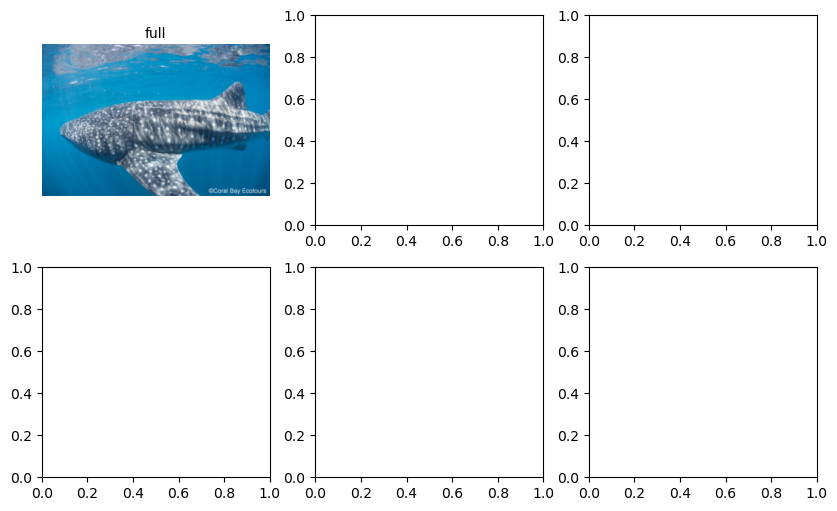

In [2]:
from data.wildlife_dataset import WildlifeDataset
from torchvision.transforms import Resize
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

methods = ['full', 'full_mask', 'full_hide', 'bbox', 'bbox_mask', 'bbox_hide']
for i, method in enumerate(methods):
    dataset = WildlifeDataset(d.df, root, img_load=method, transform=[Resize(256) ,Resize(256)])
    img, _ = dataset[4]

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(method, fontsize=10, pad=5)


plt.tight_layout()
plt.show()

In [3]:
d.df

image_id                              identity  \
0            0  10563a2a-4c62-e8c9-e5a5-8582bf2eb059   
1            1  341569f2-1f34-4884-1dd3-79137be4c77f   
2            2  69f95579-8a42-8d93-8d78-7b641952933c   
3            3  26560de1-6930-ddaf-5069-f7b85acd40fb   
4            4  a785af89-b8c0-5e7b-acec-c4874ec5483f   
...        ...                                   ...   
7688      7688  431741cc-839f-cbaf-9859-162abfa36ba4   
7689      7689  13358d13-b940-7836-2d35-d00e8310b297   
7690      7690  ecec2054-01c7-ed9d-94c6-603a3836f2f2   
7691      7691  461d166d-0321-fe1b-8796-dbcb72672a64   
7692      7692  26560de1-6930-ddaf-5069-f7b85acd40fb   

                                                   path  \
0     whaleshark.coco/images/train2020/000000000001.jpg   
1     whaleshark.coco/images/train2020/000000000002.jpg   
2     whaleshark.coco/images/train2020/000000000003.jpg   
3     whaleshark.coco/images/train2020/000000000004.jpg   
4     whaleshark.coco/images/train2020/000000000005.jpg   
...                                                 ...   
7688  whaleshark.coco/images/train2020/000000007689.jpg   
7689  whaleshark.coco/images/train2020/000000007690.jpg   
7690  whaleshark.coco/images/train2020/000000007691.jpg   
7691  whaleshark.coco/images/train2020/000000007692.jpg   
7692  whaleshark.coco/images/train2020/000000007693.jpg   

                         bbox                 date orientation  
0       [18, 582, 2412, 1248]                  NaN       right  
1      [511, 237, 2387, 1275]                  NaN        left  
2       [317, 627, 2196, 832]                  NaN        left  
3         [78, 7, 2898, 2006]                  NaN        left  
4      [198, 414, 2788, 1561]  2017-02-28 12:28:49        left  
...                       ...                  ...         ...  
7688     [0, 254, 2996, 2171]                  NaN        left  
7689   [624, 479, 2120, 1512]                  NaN        back  
7690     [0, 192, 2917, 2191]                  NaN       right  
7691    [53, 287, 2941, 2092]                  NaN        left  
7692  [1134, 464, 1847, 1495]                  NaN        left  

[7693 rows x 6 columns]

Number of identitites            543
Number of all animals            7693
Number of animals with one image 31
Number of unidentified animals   0
Images span                      5.2 years


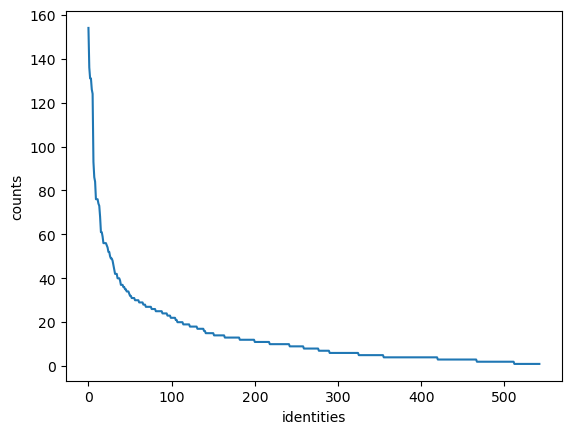

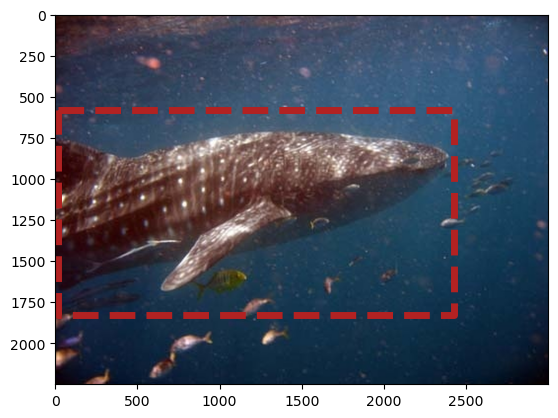

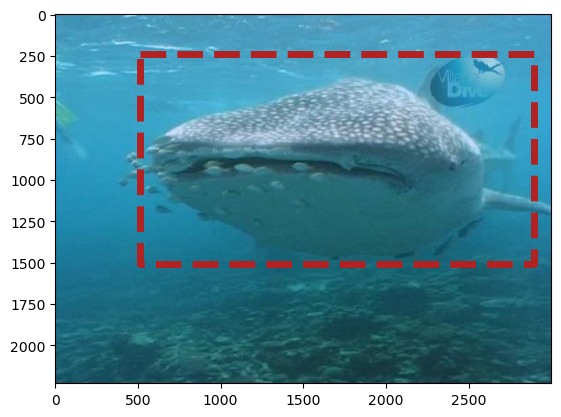

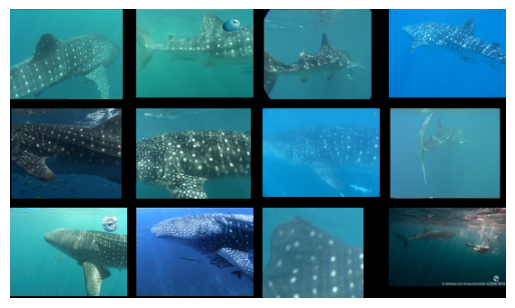

image_id                              identity  \
0            0  10563a2a-4c62-e8c9-e5a5-8582bf2eb059   
1            1  341569f2-1f34-4884-1dd3-79137be4c77f   
2            2  69f95579-8a42-8d93-8d78-7b641952933c   
3            3  26560de1-6930-ddaf-5069-f7b85acd40fb   
4            4  a785af89-b8c0-5e7b-acec-c4874ec5483f   
...        ...                                   ...   
7688      7688  431741cc-839f-cbaf-9859-162abfa36ba4   
7689      7689  13358d13-b940-7836-2d35-d00e8310b297   
7690      7690  ecec2054-01c7-ed9d-94c6-603a3836f2f2   
7691      7691  461d166d-0321-fe1b-8796-dbcb72672a64   
7692      7692  26560de1-6930-ddaf-5069-f7b85acd40fb   

                                                   path  \
0     whaleshark.coco/images/train2020/000000000001.jpg   
1     whaleshark.coco/images/train2020/000000000002.jpg   
2     whaleshark.coco/images/train2020/000000000003.jpg   
3     whaleshark.coco/images/train2020/000000000004.jpg   
4     whaleshark.coco/images/train2020/000000000005.jpg   
...                                                 ...   
7688  whaleshark.coco/images/train2020/000000007689.jpg   
7689  whaleshark.coco/images/train2020/000000007690.jpg   
7690  whaleshark.coco/images/train2020/000000007691.jpg   
7691  whaleshark.coco/images/train2020/000000007692.jpg   
7692  whaleshark.coco/images/train2020/000000007693.jpg   

                         bbox                 date orientation  
0       [18, 582, 2412, 1248]                  NaN       right  
1      [511, 237, 2387, 1275]                  NaN        left  
2       [317, 627, 2196, 832]                  NaN        left  
3         [78, 7, 2898, 2006]                  NaN        left  
4      [198, 414, 2788, 1561]  2017-02-28 12:28:49        left  
...                       ...                  ...         ...  
7688     [0, 254, 2996, 2171]                  NaN        left  
7689   [624, 479, 2120, 1512]                  NaN        back  
7690     [0, 192, 2917, 2191]                  NaN       right  
7691    [53, 287, 2941, 2092]                  NaN        left  
7692  [1134, 464, 1847, 1495]                  NaN        left  

[7693 rows x 6 columns]

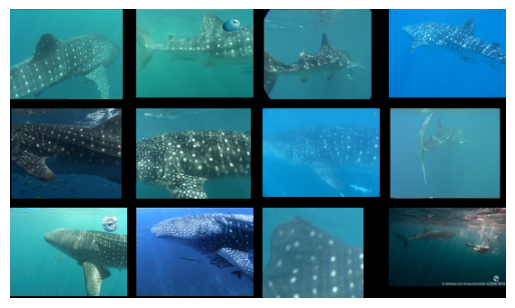

In [7]:
analysis.display_statistics(d.df, unknown_name=d.unknown_name)
analysis.plot_bbox_segmentation(d.df, d.root, n=2)
grid = d.plot_grid(n_rows=3, n_cols=4)
display(grid)
display(d.df)

In [2]:
import sys
sys.path.append('..')
from models.triplet_loss_model import TripletModel
from data.raptors_wildlife import WildlifeReidDataModule

data = WildlifeReidDataModule(data_dir=root, metadata=d.df[:], size = 224, preprocess_lvl=2, cache_path='../dataset/dataframe/cache_whaleshark.csv', animal_cat = 'fish', only_cache=True)

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


Split: time-unaware closed-set
Samples: train/test/unassigned/total = 6108/1585/0/7693
Classes: train/test/unassigned/total = 543/512/0/543
Samples: train only/test only        = 31/0
Classes: train only/test only/joint  = 31/0/512

Fraction of train set     = 79.40%
Fraction of test set only = 0.00%
Train set size: 6108
Test set size: 1585


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_l

length of training dataset: 2204
length of query dataset: 102
length of gallery dataset: 482


Batch Size: 8
Image Shape: torch.Size([8, 4, 256, 256])
Labels Shape: torch.Size([8])


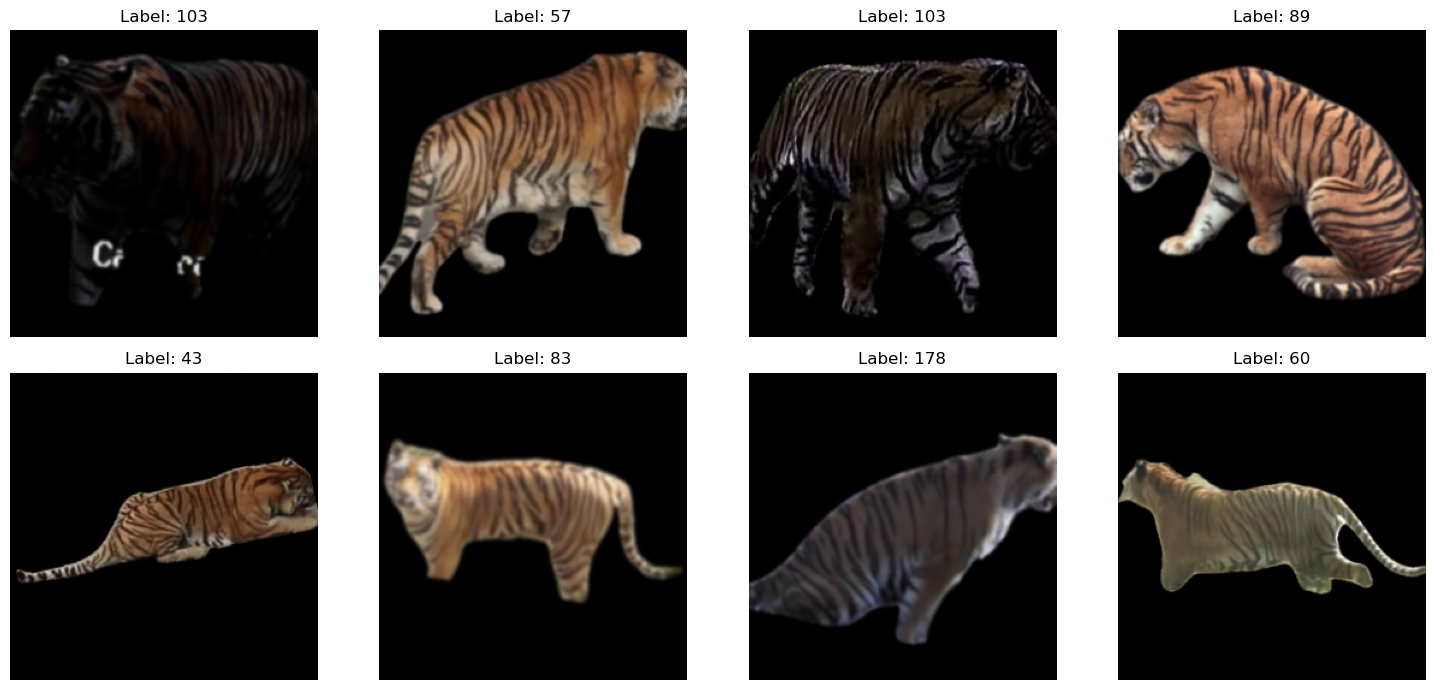

In [3]:

import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denormalize

mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

train_dataloader = data.train_dataloader()

# Fetch a batch of images (assuming batch size is 8 for example)
batch = next(iter(train_dataloader))
images,labels = batch
print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)
print("Labels Shape:", labels.shape)

# Extract images and labels from the batch
images, labels = batch  # This assumes batch is structured as (images, labels)

# Plot the images
fig, axes = plt.subplots(2, 4, figsize=(15, 7))
axes = axes.flatten()

for i in range(8):  # Assuming batch size is 8
    # image_np = unnormalize(images[i], mean, std).permute(1, 2, 0).numpy()  # [:3] selects RGB channels

    image_np = images[i].numpy()  # Convert from PyTorch tensor to numpy array
    image_np = denormalize(image_np, mean, std)  # Denormalize the image

    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    label = labels[i].item()  # Convert label tensor to Python scalar using .item()
    ax = axes[i]
    ax.imshow(image_np)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Batch Size: 8
Image Shape: torch.Size([8, 3, 224, 224])
Labels Shape: torch.Size([8])


IndexError: index 3 is out of bounds for dimension 0 with size 3

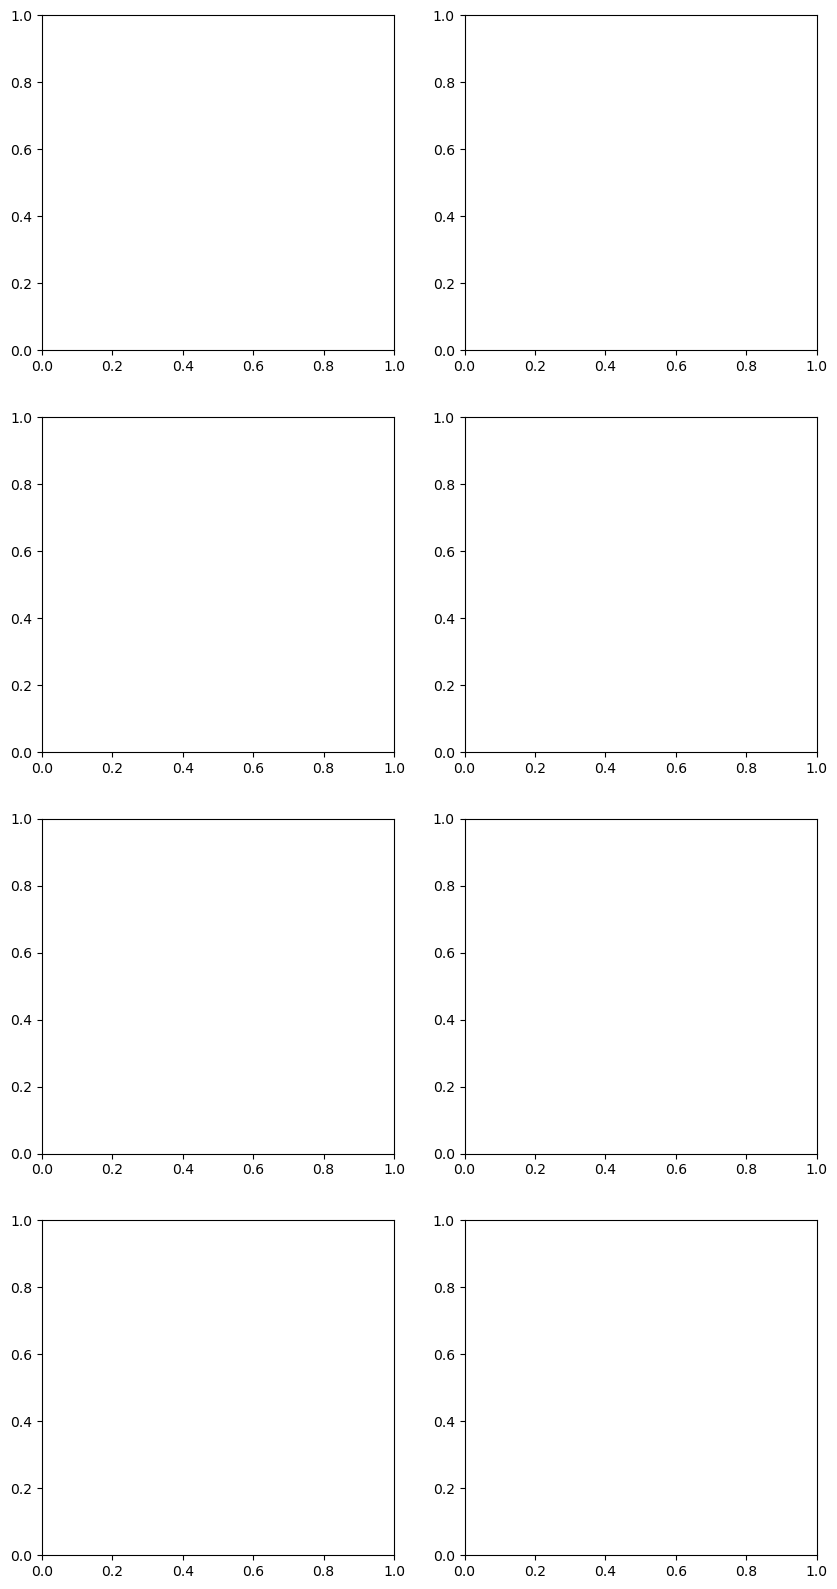

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denormalize


# mean = [0.485, 0.456, 0.406] 
# std = [0.229, 0.224, 0.225]
# train_dataloader = data.train_dataloader()

batch = next(iter(train_dataloader))
images, labels = batch

print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)
print("Labels Shape:", labels.shape)

# Plot the images and their skeletons side by side
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 4 rows, 2 columns (RGB and skeleton for each image)
axes = axes.flatten()

for i in range(4):  # Assuming batch size is at least 4

    image_np = images[i].numpy()  # Convert from PyTorch tensor to numpy array
    image_np = denormalize(image_np, mean, std)  # Denormalize the First 3 channels (RGB)

    skeleton_image = images[i][3].cpu().numpy()  # 4th channel (Skeleton)

    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    label = labels[i].item()  # Convert label tensor to Python scalar using .item()

    # Plot RGB image
    ax_rgb = axes[i * 2]
    ax_rgb.imshow(image_np)
    # ax_rgb.imshow(np.clip(image_np, 0, 1))  # Clip values to [0, 1] for valid image display
    ax_rgb.set_title(f'RGB Image - Label: {labels[i].item()}')
    ax_rgb.axis('off')

    # Plot Skeleton image (grayscale)
    ax_skel = axes[i * 2 + 1]
    ax_skel.imshow(skeleton_image, cmap='gray')  # Plot skeleton channel as a grayscale image
    ax_skel.set_title(f'Skeleton Channel - Label: {labels[i].item()}')
    ax_skel.axis('off')

plt.tight_layout()
plt.show()

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Batch Size: 8
Image Shape: torch.Size([8, 18, 224, 224])
Labels Shape: torch.Size([8])


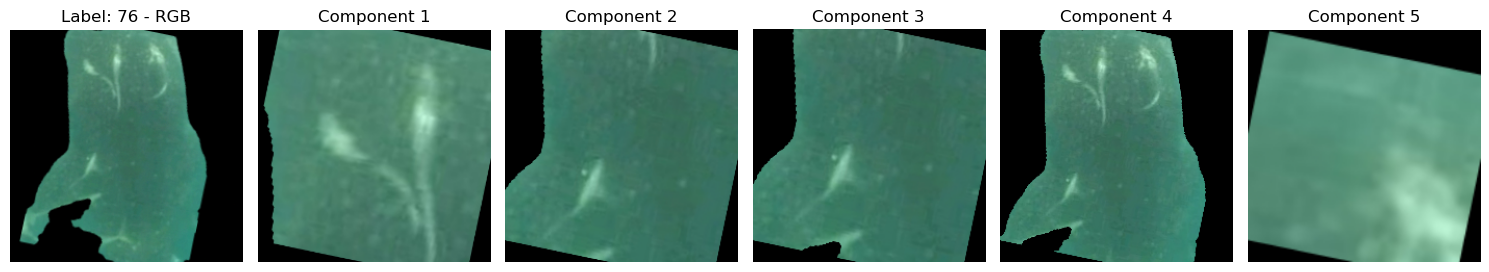

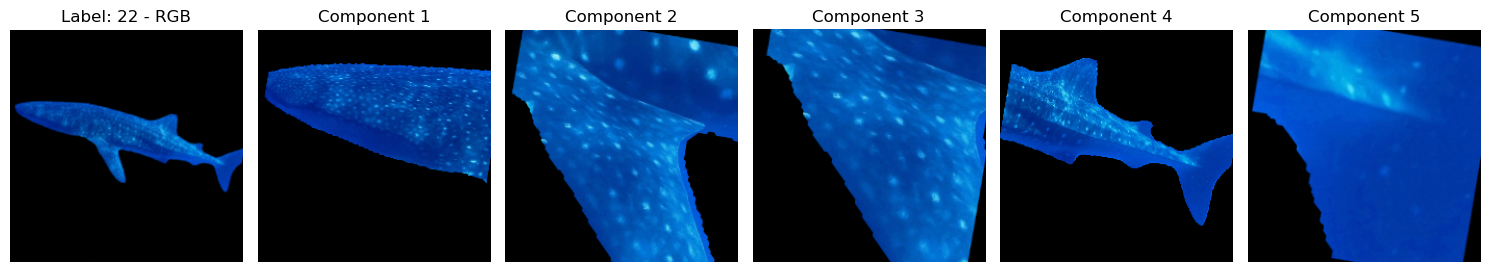

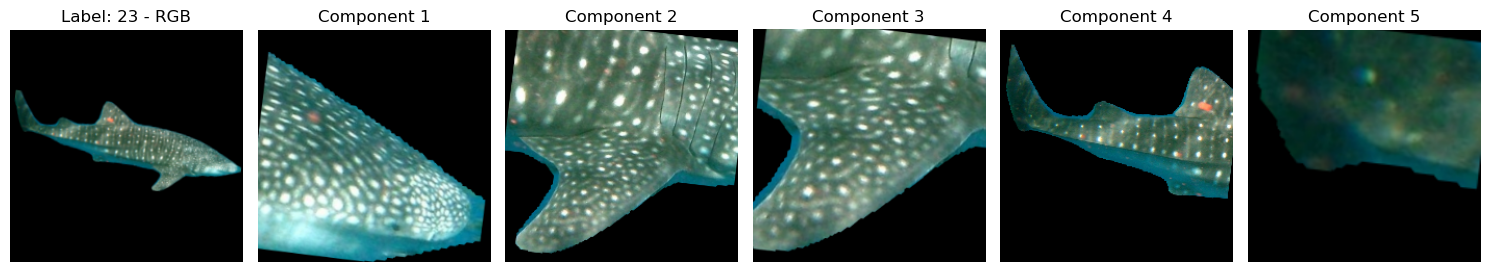

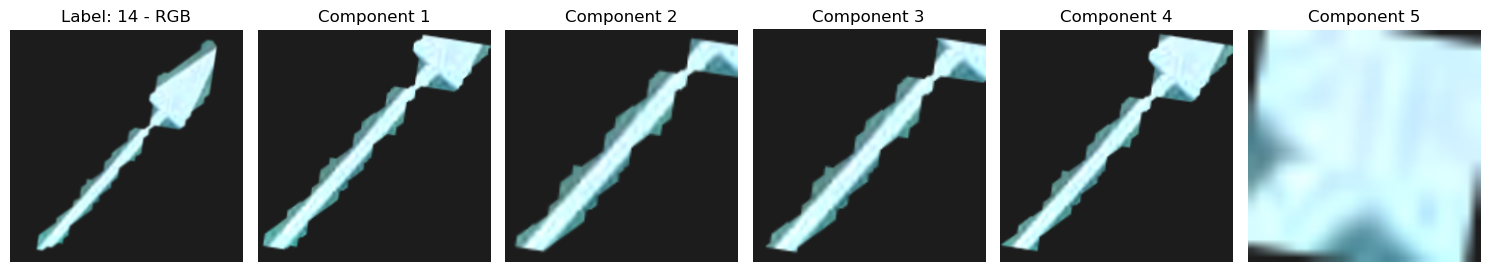

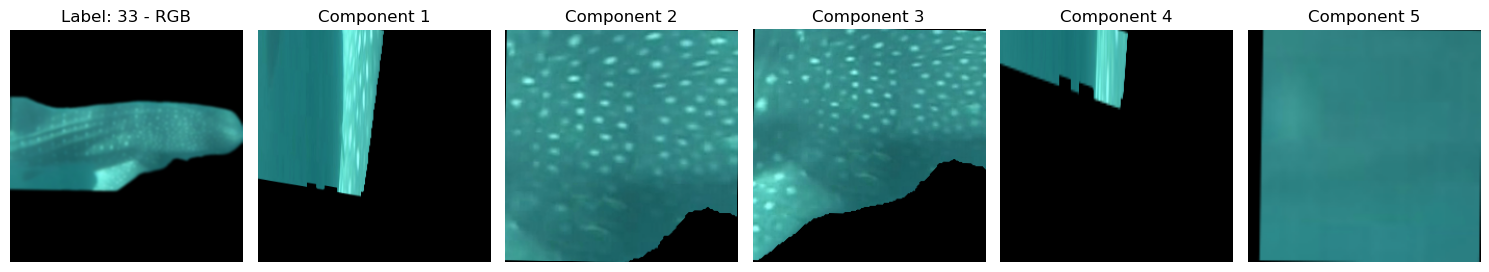

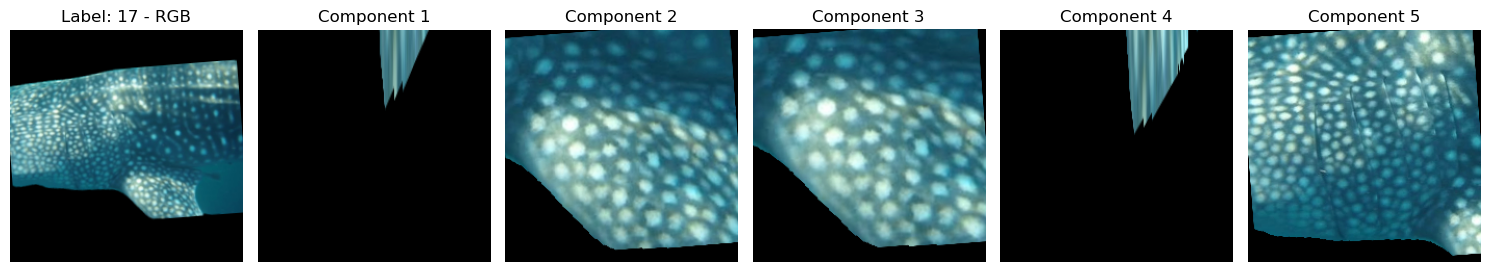

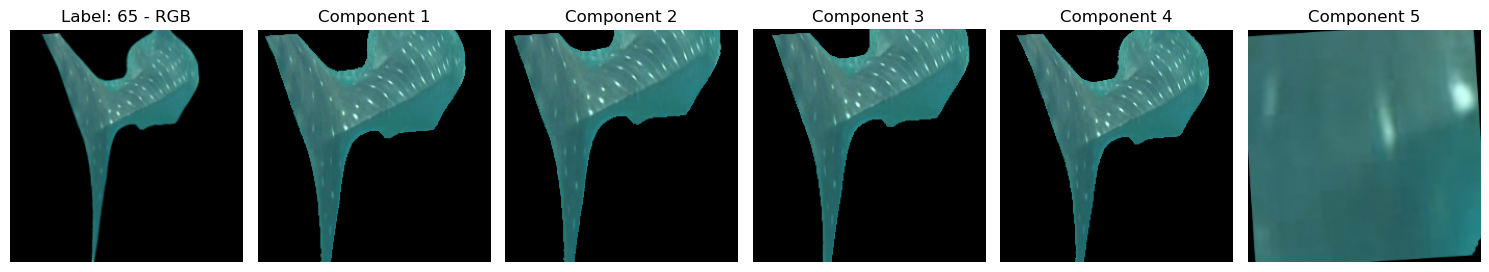

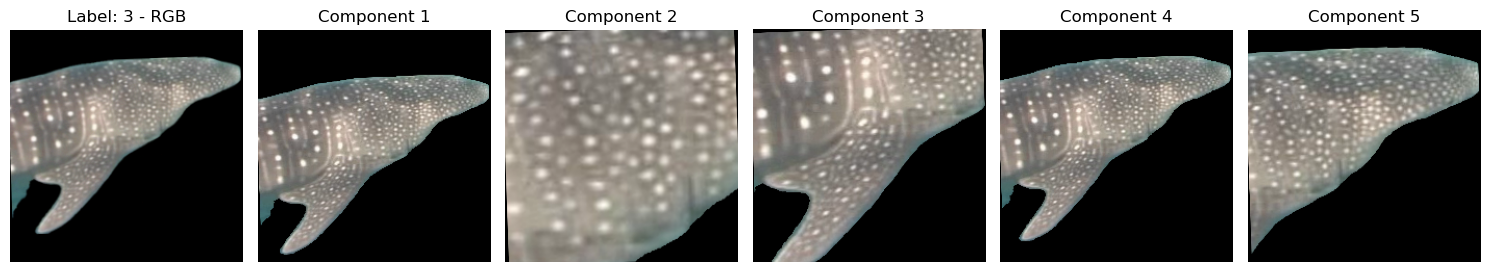

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denorm_RGB_components

# Mean and standard deviation values to denormalize each RGB channel
mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

train_dataloader = data.train_dataloader()

# Fetch a batch of images (assuming batch size is 8 for example)
batch = next(iter(train_dataloader))
images, labels = batch
print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)  # Expected shape: (batch_size, channels, height, width)
print("Labels Shape:", labels.shape)

for i in range(images.size(0)):  # Loop through each image in the batch
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))  # Create 2x3 grid for each image
    axes = axes.flatten()

    # Extract the full image with RGB + component channels
    full_image = images[i].numpy()  # Shape: (channels, height, width)

    # Denormalize the full image (including RGB and component channels)
    full_image_denorm = denorm_RGB_components(full_image, mean, std)

    # Plot RGB image (first 3 channels)
    rgb_image = full_image_denorm[:3]  # Extract the first 3 channels (RGB)
    rgb_image = np.transpose(rgb_image, (1, 2, 0))  # Convert to (H, W, C) for plotting
    
    ax = axes[0]
    ax.imshow(rgb_image.astype(np.uint8))  # Convert back to integer type for proper visualization
    ax.set_title(f'Label: {labels[i].item()} - RGB')
    ax.axis('off')

    # Plot component channels (next 5 sets of 3 channels each)
    for j in range(5):  # Assuming 5 components, each with 3 channels
        # Extract the next set of 3 channels for the current component
        component_channels = full_image_denorm[3 + (j * 3): 3 + (j * 3) + 3]  # Extract the component channels
        component_image = np.transpose(component_channels, (1, 2, 0))  # Convert to (H, W, C) for plotting

        ax = axes[j + 1]  # Move to the next subplot (j + 1 because axes[0] is used for RGB)
        ax.imshow(component_image.astype(np.uint8))  # Convert back to integer type for proper visualization
        ax.set_title(f'Component {j + 1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [3]:
# ALTERNATE INFERENCE FROM WILDLIFE-TOOLS
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity.cosine import CosineSimilarity
from utils.triplet_loss_utils import KnnClassifier
import numpy as np


import timm

query_loader, gallery_loader = data.val_dataloader()
gallery_dataset = gallery_loader.dataset
query_dataset = query_loader.dataset

backbone = timm.create_model('hf-hub:BVRA/MegaDescriptor-T-224', num_classes=0, pretrained=True)
extractor = DeepFeatures(backbone)
query, database = extractor(query_dataset), extractor(gallery_dataset)

print(f'Query features shape: {query.shape}, Database features shape: {database.shape}')
# Cosine similarity between deep features
similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)['cosine']
print("Similarity matrix: \n", similarity.shape)

### Debug: Check indices and sizes
print(f"Database labels size: {len(gallery_dataset.labels_map)}")
print(f"Sample indices from similarity: {np.argmax(similarity, axis=1)[:10]}")

# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=gallery_dataset.labels)
preds = classifier(similarity)
preds = gallery_dataset.labels_map[preds]
print("Prediction \t", preds)
print("Ground truth \t", query_dataset.labels_string)

acc = sum(preds == query_dataset.labels_string) / len(query_dataset.labels_string)
print('\n Accuracy: ', acc)

  0%|                                                                         | 0/1 [00:00<?, ?it/s]/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
  0%|                                                                         | 0/4 [00:00<?, ?it/s]/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
100%|█████████████████████████████████████████████████████████████████| 4/4 [00:57<00:00, 14.43s/it]

Query features shape: (102, 768), Database features shape: (482, 768)
Similarity matrix: 
 (102, 482)
Database labels size: 265
Sample indices from similarity: [167 263 374  43  24  51 268  44 469 216]
102
482
Prediction 	 ['4507ee90-84b6-fecb-cd98-2fbddd8707fb' '7c8a623d-c9cf-0844-f844-b2ed52063b87' 'bb27ae2e-1c8a-9a2b-e28f-eb8d05360bda' '18b0f340-8147-3d7f-a8aa-22d590108a1b' '0f46e82c-b6a7-5819-9852-003f6861922c' '1c6a8bf4-8670-d895-02dd-cced81f027f6' '838a17cc-1de8-c400-10d2-40a2f2a44350' '18b0f340-8147-3d7f-a8aa-22d590108a1b'
 'f3a0ee0a-ba5c-1fcb-866f-e457910c48b3' '67e6aff7-0b58-eb98-ef49-e543a31f27d3' '431741cc-839f-cbaf-9859-162abfa36ba4' '18b0f340-8147-3d7f-a8aa-22d590108a1b' 'a2bbb21c-473f-74a9-15e2-b6661457ac0c' '23ee60ca-68d4-e54f-183c-369af122897b' 'bfdea985-b166-82c5-ecab-4a79840da7c0' '0bf70dba-2bd4-39dd-48a9-227ab6f48bc0'
 'c807ea87-84b8-e26a-0d45-b257940557eb' '416bfe55-772e-29e3-23a5-ea7d9fc17997' '5567fe79-b98d-e325-0990-02c0cd54c38e' '23ee60ca-68d4-e54f-183c-369af122


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:80: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


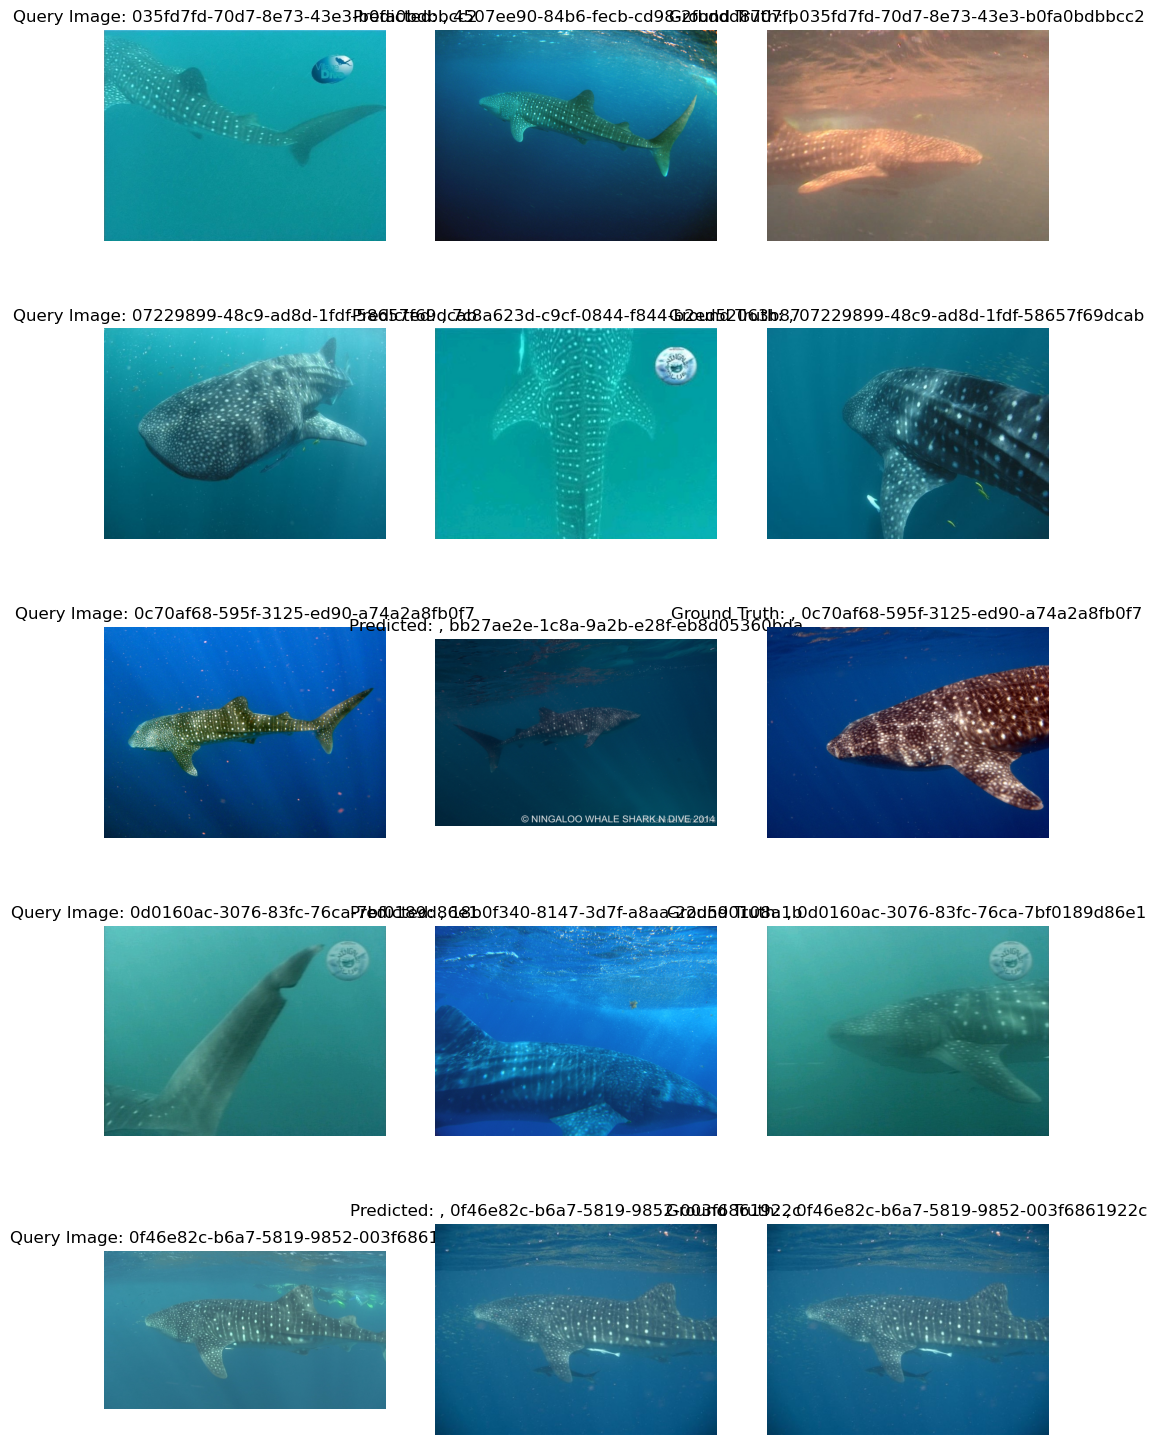

In [4]:
from utils.visualization import query_prediction_results

query_prediction_results(root, query_dataset.metadata, gallery_dataset.metadata, 0, preds, num_images=5)

# Training

In [10]:
from pytorch_lightning import Trainer
from models.triplet_loss_model import TripletModel

# Create the LightningModule with Triplet Loss
model = TripletModel(backbone_model_name='resnet18', margin=0.2, mining_type='hard', re_ranking=True, preprocess_lvl=2)

# Train the model
trainer_args = {
        'max_epochs': 1,
        # 'callbacks': callbacks,
        'default_root_dir': 'logs',
        'accelerator': 'cpu',
        'devices': 1,
        # 'logger': wandb_logger,
        'deterministic': True,
    }
trainer = Trainer(**trainer_args)
trainer.fit(model, data)

# trainer.validate(model, dataloaders=data.val_dataloader())

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | backbone | ResNet             | 11.2 M | train
1 | embedder | Linear             | 65.7 K | train
2 | loss_fn  | TripletMarginLoss  | 0      | train
3 | miner    | TripletMarginMiner | 0      | train
--------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.969    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

using GPU to compute original distance
starting re_ranking


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Training: |          | 0/? [00:00<?, ?it/s]

Random mAP: 0.0


Validation: |          | 0/? [00:00<?, ?it/s]

using GPU to compute original distance
starting re_ranking


`Trainer.fit` stopped: `max_epochs=1` reached.
